In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.copy_on_write = True
from scipy.stats import spearmanr




In [ ]:
df = pd.read_csv(f"/Users/nzaramakouadio/Documents/Duke Classes/Fall 2025/Data Vis/sephora_products_analysis/data/sephora_website_dataset.csv")

# Question 1: Which product categories (skincare, makeup, hair care) demonstrate the strongest correlation between customer ratings and average price points?

In [3]:
columns = ["category", "price", "rating"]
df1 = df[columns]
df1

,category,price,rating
0,Fragrance,66.0,4.0
1,Cologne,66.0,4.5
2,Perfume,180.0,4.5
3,Perfume,120.0,4.5
4,Fragrance,72.0,3.5
...,...,...,...
9163,Face Masks,6.0,2.0
9164,Lip Sets,15.0,0.0
9165,Tinted Moisturizer,16.0,0.0
9166,no category,50.0,5.0


In [4]:
category_counts = df1['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

category_counts.tail(50)
category_counts

,category,count
0,Perfume,665
1,Moisturizers,451
2,Face Serums,384
3,Value & Gift Sets,378
4,Face Wash & Cleansers,247
...,...,...
138,Wellness,1
139,High Tech Tools,1
140,Hair Styling & Treatments,1
141,Curls & Coils,1


In [5]:
cat_name= df1['category'].dropna().unique()

with open('cat_list.txt', 'w', encoding='utf-8') as f:
    for category in cat_name:
        f.write(f"{category}\n")

In [6]:
category_map = {
    # Makeup
    "Eye Palettes": "Makeup",
    "Highlighter": "Makeup",
    "Cheek Palettes": "Makeup",
    "Lipstick": "Makeup",
    "Face Primer": "Makeup",
    "Color Correct": "Makeup",
    "Tinted Moisturizer": "Makeup",
    "Concealer": "Makeup",
    "Mascara": "Makeup",
    "Foundation": "Makeup",
    "Setting Spray & Powder": "Makeup",
    "Contour": "Makeup",
    "Eyeshadow": "Makeup",
    "Lip Gloss": "Makeup",
    "False Eyelashes": "Makeup",
    "Bronzer": "Makeup",
    "Eyeliner": "Makeup",
    "Eye Primer": "Makeup",
    "Eye Sets": "Makeup",
    "Blush": "Makeup",
    "Liquid Lipstick": "Makeup",
    "Makeup": "Makeup",
    "Makeup Palettes": "Makeup",
    "Lip Stain": "Makeup",
    "Lip Sets": "Makeup",
    "Lip Liner": "Makeup",
    "Mini Size": "Makeup",
    "Makeup Removers": "Makeup",
    "Blotting Papers": "Makeup",
    "Face Brushes": "Makeup",
    "Brush Sets": "Makeup",
    "Powder Brush": "Makeup",
    "Lid Shadow Brush": "Makeup",
    "Lip Brushes": "Makeup",
    "Eye Brushes": "Makeup",
    "Makeup Bags & Travel Cases": "Tools & Accessories",

    # Skincare
    "Face Serums": "Skincare",
    "Moisturizers": "Skincare",
    "Eye Creams & Treatments": "Skincare",
    "Face Sunscreen": "Skincare",
    "Face Masks": "Skincare",
    "Face Wash & Cleansers": "Skincare",
    "Face Wash": "Skincare",
    "Face Oils": "Skincare",
    "Hand Cream & Foot Cream": "Skincare",
    "Decollete & Neck Creams": "Skincare",
    "Mists & Essences": "Skincare",
    "Beauty Supplements": "Wellness",
    "Facial Peels": "Skincare",
    "Exfoliators": "Skincare",
    "Toners": "Skincare",
    "Sheet Masks": "Sk skincare",
    "Eye Masks": "Skincare",
    "Face Wipes": "Skincare",
    "Night Creams": "Skincare",
    "Anti-Aging": "Skincare",
    "Blemish & Acne Treatments": "Skincare",
    "Face Sets": "Gift & Value",
    "Lip Balm & Treatment": "Skincare",
    "Lip Balms & Treatments": "Skincare",
    "Lip Treatments": "Skincare",
    "Body Lotions & Body Oils": "Skincare",
    "Body Sprays & Deodorant": "Skincare",
    "Lotions & Oils": "Skincare",
    "Body Sunscreen": "Skincare",
    "Body Products": "Skincare",
    "Bath & Shower": "Skincare",
    "Body Wash & Shower Gel": "Skincare",
    "Bath Soaks & Bubble Bath": "Skincare",
    "Deodorant & Antiperspirant": "Skincare",
    "Self Tanners": "Skincare",
    "Scrub & Exfoliants": "Skincare",
    "Cellulite & Stretch Marks": "Skincare",
    "For Body": "Skincare",
    "Body Moisturizers": "Skincare",

    # Haircare
    "Conditioner": "Haircare",
    "Shampoo": "Haircare",
    "Hair Styling Products": "Haircare",
    "Scalp & Hair Treatments": "Haircare",
    "Hair Masks": "Haircare",
    "Hair Spray": "Haircare",
    "Hair Oil": "Haircare",
    "Hair Primers": "Haircare",
    "Dry Shampoo": "Haircare",
    "Hair Thinning & Hair Loss": "Haircare",
    "Color Care": "Haircare",
    "Curls & Coils": "Haircare",
    "Leave-In Conditioner": "Haircare",
    "Hair Products": "Haircare",
    "Shampoo & Conditioner": "Haircare",
    "Hair Straighteners & Flat Irons": "Haicare",
    "Hair Dryers": "Haicare",
    "Curling Irons": "Haircare",
    "Hair Brushes & Combs": "Haircare",
    "Hair Accessories": "Haircare",

    # Fragrance
    "Fragrance": "Fragrance",
    "Cologne": "Fragrance",
    "Perfume": "Fragrance",
    "Body Mist & Hair Mist": "Fragrance",
    "Perfume Gift Sets": "Gift & Value",
    "Cologne Gift Sets": "Gift & Value",
    "Rollerballs & Travel Size": "Fragrance",
    "Candles & Home Scents": "Wellness",
    "Candles": "Wellness",
    "Diffusers": "Wellness",

    # Men
    "Shaving": "Men's Grooming",
    "Aftershave": "Men's Grooming",
    "Hair Removal & Shaving": "Men's Grooming",
    "Hair Removal": "Men's Grooming",
    "Deodorant for Men": "Men's Grooming",

    # Tools & Accessories
    "Tweezers & Eyebrow Tools": "Tools & Accessories",
    "Mirrors & Sharpeners": "Tools & Accessories",
    "Facial Rollers": "Tools & Accessories",
    "Sponges & Applicators": "Tools & Accessories",

    # Wellness
    "Holistic Wellness": "Wellness",
    "Wellness": "Wellness",
    "Teeth Whitening": "Wellness",
     "Spa Tools": "Wellness",

    # Gifts & Value
    "Value & Gift Sets": "Gift & Value",

    # Fallback
    "no category": "Other"
}

# Create aggregated category column

df1['main_category'] = df1['category'].map(category_map).fillna('Other')
df1.head(2)

,category,price,rating,main_category
0,Fragrance,66.0,4.0,Fragrance
1,Cologne,66.0,4.5,Fragrance


In [7]:
df1["main_category"].value_counts()

main_category
Skincare               2758
Makeup                 2559
Fragrance              1103
Haircare               1039
Gift & Value            570
Other                   529
Wellness                352
Tools & Accessories     101
Sk skincare              56
Haicare                  55
Men's Grooming           46
Name: count, dtype: int64

In [8]:
# Subset for catgeories that are the most rated

categories_subset = ["Skincare", "Makeup", "Fragrance", "Haircare", "Gift & Value", "Wellness"]

df1_subset = df1.loc[df1["main_category"].isin(categories_subset)]


## A. Trendline Chart: Ratings vs Price for Each Category

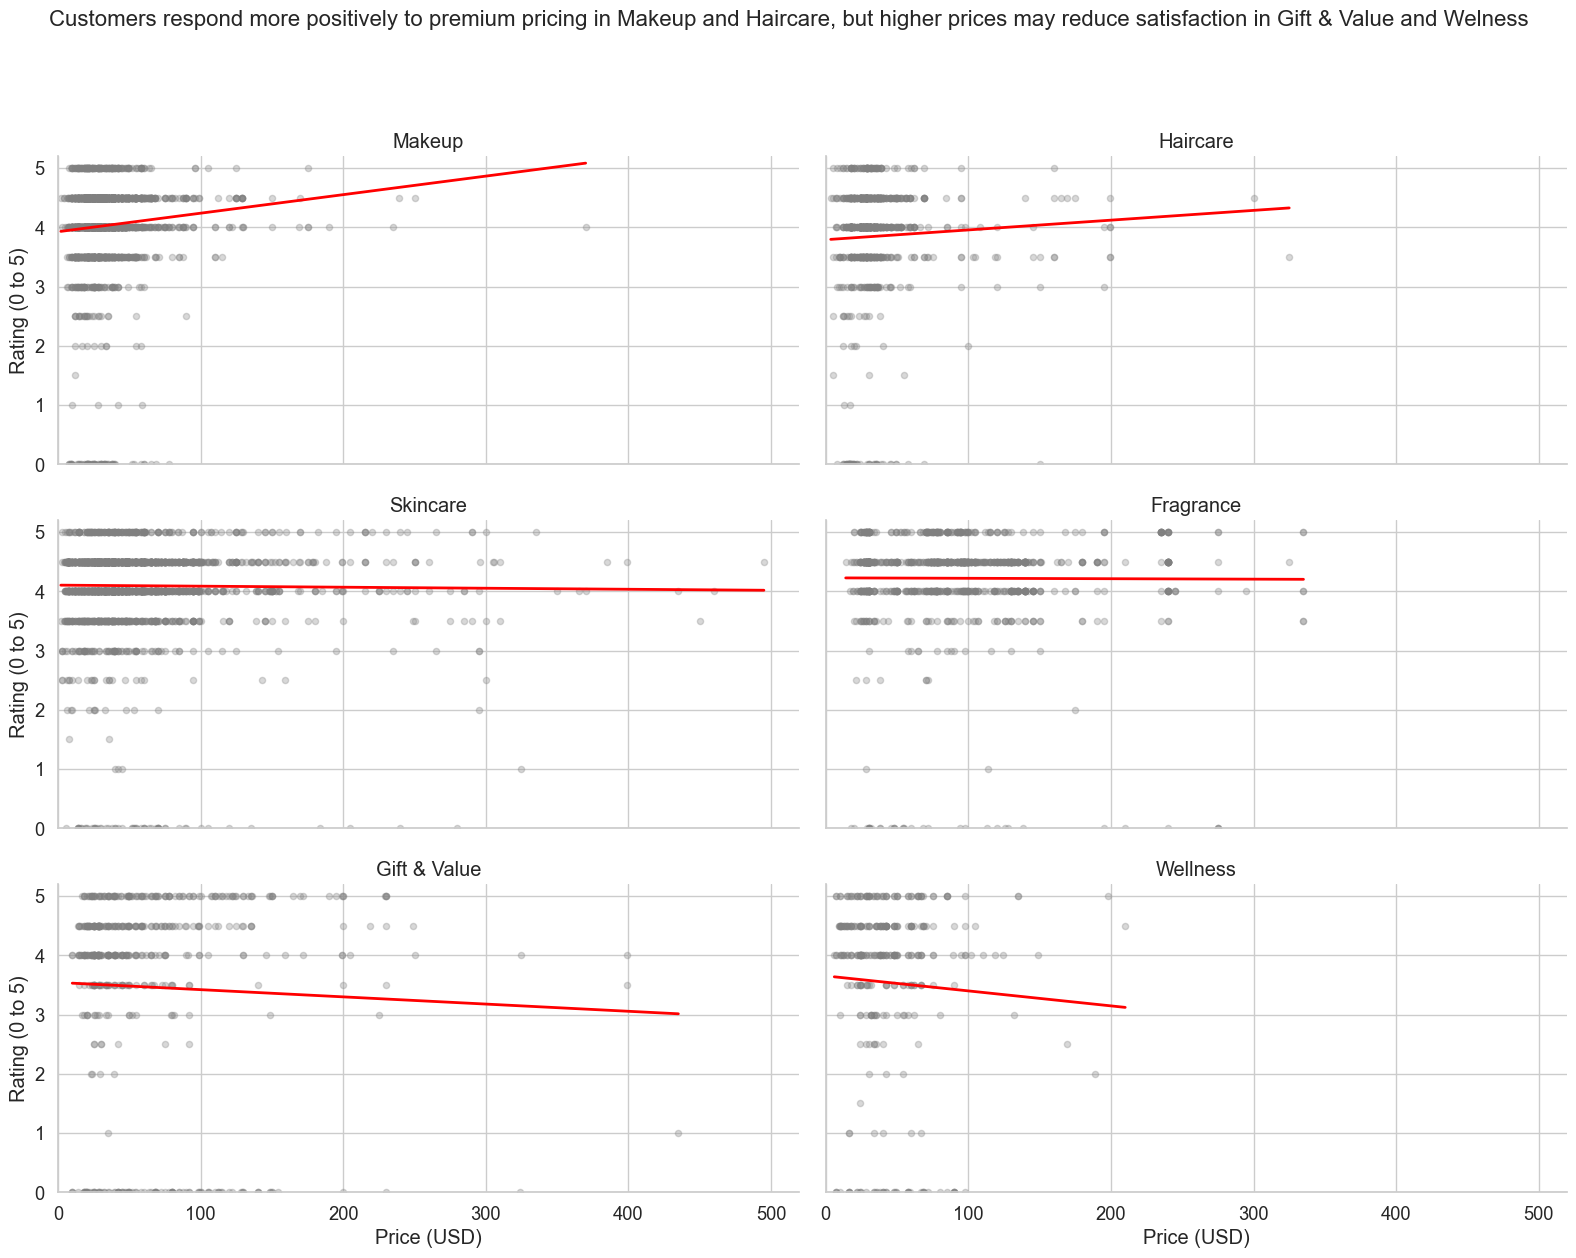

In [9]:
# Keep only rows with price, rating, and main_category
df_vis = df1_subset.dropna(subset=["price", "rating", "main_category"]).copy()

# Group categories by similar trendline shape
categories = ["Makeup", "Haircare", "Skincare", "Fragrance", "Gift & Value", "Wellness"]

# Filter to those categories only
df_vis = df_vis[df_vis["main_category"].isin(categories)]

# Clean plot style
sns.set(style="whitegrid", font_scale=1.2)

# Create facet scatter plots with regression trend lines
g = sns.lmplot(
    data=df_vis,
    x="price",
    y="rating",
    col="main_category",
    col_order=categories,
    hue=None,
    ci=None,  # ⬅️ This removes the red shadow
    scatter_kws={"alpha": 0.3, "s": 20, "color":"grey"},
    line_kws={"color": "red", "linewidth": 2},
    aspect=2,
    height=4,
    col_wrap=2  # Wrap into 3 rows, 2 charts per row
)

# Titles & axis labels
g.set_titles("{col_name}")
g.set_axis_labels("Price (USD)", "Rating (0 to 5)")

# Consistent y-axis & x-axis
for ax in g.axes.flatten():
    ax.set_ylim(0, 5.2)
    ax.set_xlim(left=0)


plt.suptitle("Customers respond more positively to premium pricing in Makeup and Haircare, but higher prices may reduce satisfaction in Gift & Value and Welness", fontsize=16, y=1.05)
plt.tight_layout()
plt.savefig("Trendline.svg")
plt.show()

## B. Correlation Analysis

In [10]:

results = []

# Loop through each main_category automatically
for cat, group in df1_subset.groupby('main_category'):
    # Spearman correlation for that category
    corr, pval = spearmanr(group['price'], group['rating'])
    
    results.append({
        'main_category': cat,
        'spearman_corr': corr,
        'p_value': pval,
        'count': len(group)
    })

# Convert to a DataFrame for a nice table
results_df = pd.DataFrame(results).sort_values(by='spearman_corr', ascending=False)
results_df

## All p_values are significant so the correlation are real and not due to randomness

,main_category,spearman_corr,p_value,count
3,Makeup,0.112685,1.092152e-08,2559
2,Haircare,0.082146,8.069703e-03,1039
1,Gift & Value,0.077717,6.371003e-02,570
4,Skincare,0.027410,1.501198e-01,2758
0,Fragrance,-0.012831,6.703592e-01,1103
5,Wellness,-0.056612,2.895040e-01,352


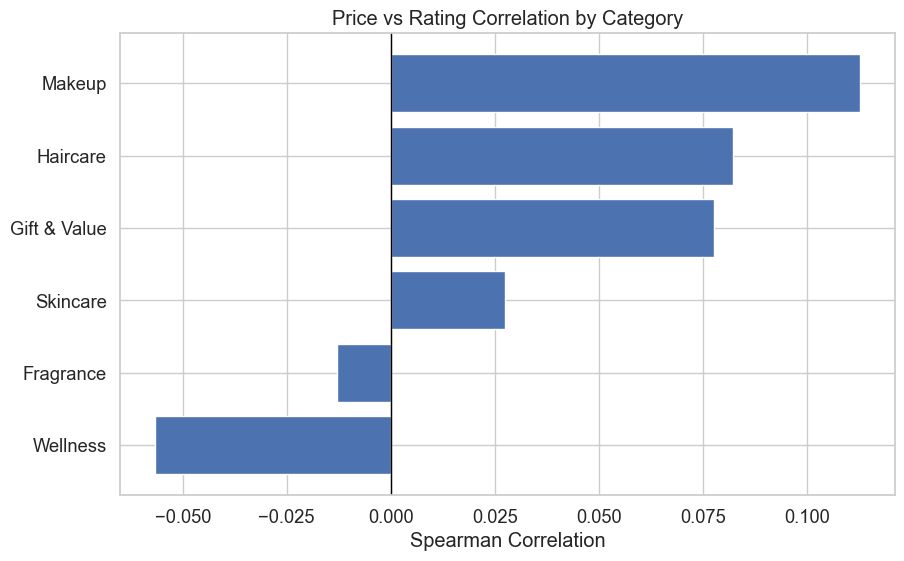

In [11]:
import matplotlib.pyplot as plt

# Sort categories by correlation for nice ordering
plot_df = results_df.sort_values(by='spearman_corr')

plt.figure(figsize=(10,6))

# Create horizontal bars
plt.barh(plot_df['main_category'], plot_df['spearman_corr'])

plt.axvline(0, color='black', linewidth=1)  # Zero reference line
plt.xlabel('Spearman Correlation')
plt.ylabel(None)
plt.title('Price vs Rating Correlation by Category')
plt.savefig("correlation.svg")
plt.show()


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Step 1: Clean the data
df_vis3 = df1_subset.dropna(subset=["price", "rating", "main_category"])

df_vis3

,category,price,rating,main_category
0,Fragrance,66.0,4.0,Fragrance
1,Cologne,66.0,4.5,Fragrance
2,Perfume,180.0,4.5,Fragrance
3,Perfume,120.0,4.5,Fragrance
4,Fragrance,72.0,3.5,Fragrance
...,...,...,...,...
9161,Brush Sets,49.0,3.5,Makeup
9162,Scrub & Exfoliants,8.0,3.5,Skincare
9163,Face Masks,6.0,2.0,Skincare
9164,Lip Sets,15.0,0.0,Makeup


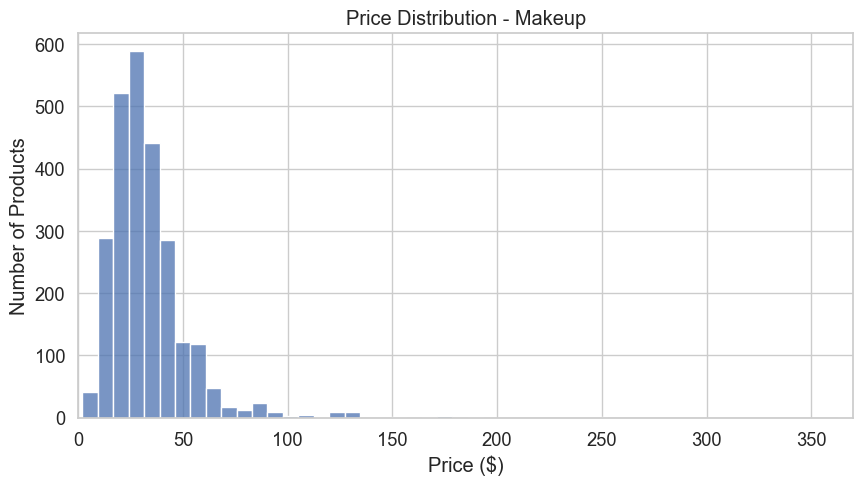

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter Makeup products
makeup_df = df_vis3[df_vis3["main_category"] == "Makeup"]

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(makeup_df["price"], bins=50)
plt.title("Price Distribution - Makeup")
plt.xlabel("Price ($)")
plt.ylabel("Number of Products")
plt.xlim(0, makeup_df["price"].max())  # optional: set limit if outliers distort view
plt.show()


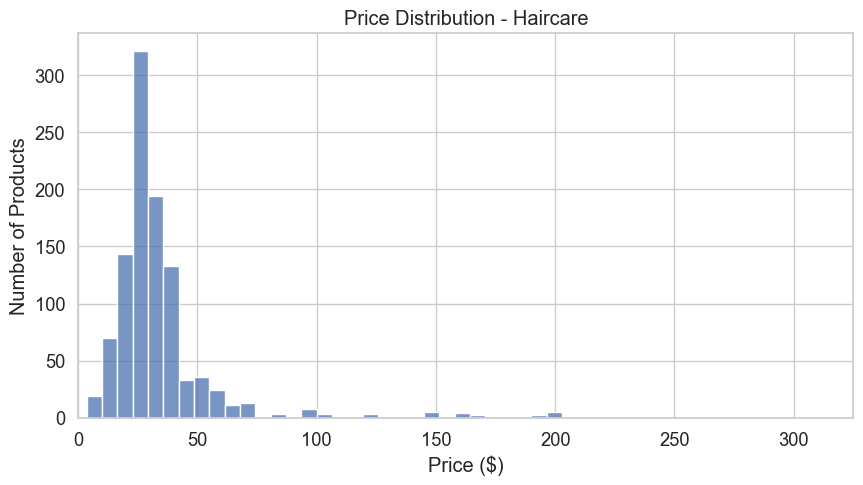

In [14]:
haircare_df = df_vis3[df_vis3["main_category"] == "Haircare"]

plt.figure(figsize=(10, 5))
sns.histplot(haircare_df["price"], bins=50)
plt.title("Price Distribution - Haircare")
plt.xlabel("Price ($)")
plt.ylabel("Number of Products")
plt.xlim(0, haircare_df["price"].max())  # again, optional
plt.show()


In [15]:

# Step 1: Filter Makeup and Haircare products


# Step 2: Define custom tier functions
def assign_makeup_tier(price):
    if price < 40:
        return "Low"
    else:
        return "High"

def assign_haircare_tier(price):
    if price < 40:
        return "Low"
    else:
        return "High"

# Step 3: Apply tier functions to new columns
makeup_df["price_tier"] = makeup_df["price"].apply(assign_makeup_tier)
haircare_df["price_tier"] = haircare_df["price"].apply(assign_haircare_tier)

# Step 4 (optional): Check how many products fall into each tier
print("Makeup Tier Counts:\n", makeup_df["price_tier"].value_counts())
print("\nHaircare Tier Counts:\n", haircare_df["price_tier"].value_counts())


Makeup Tier Counts:
 price_tier
Low     1951
High     608
Name: count, dtype: int64

Haircare Tier Counts:
 price_tier
Low     847
High    192
Name: count, dtype: int64


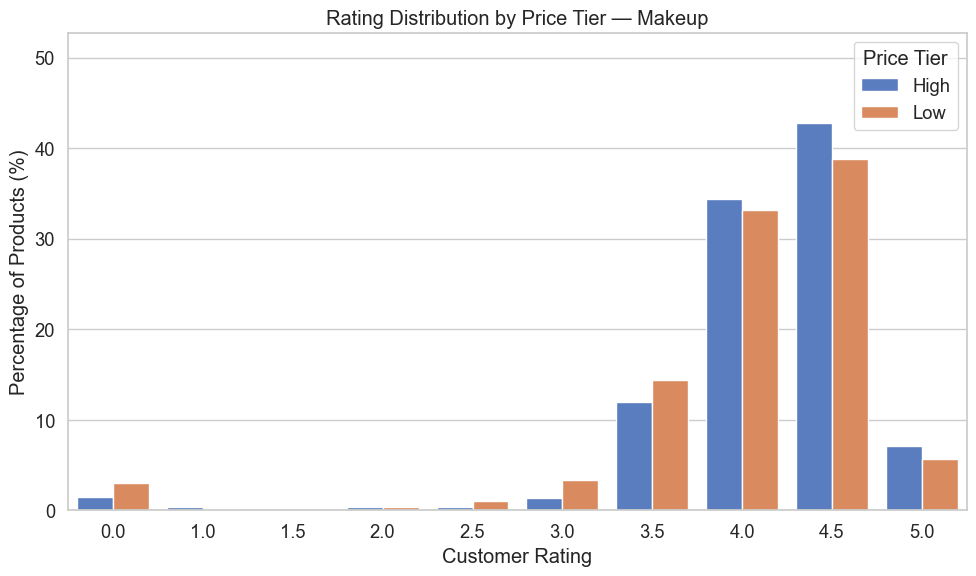

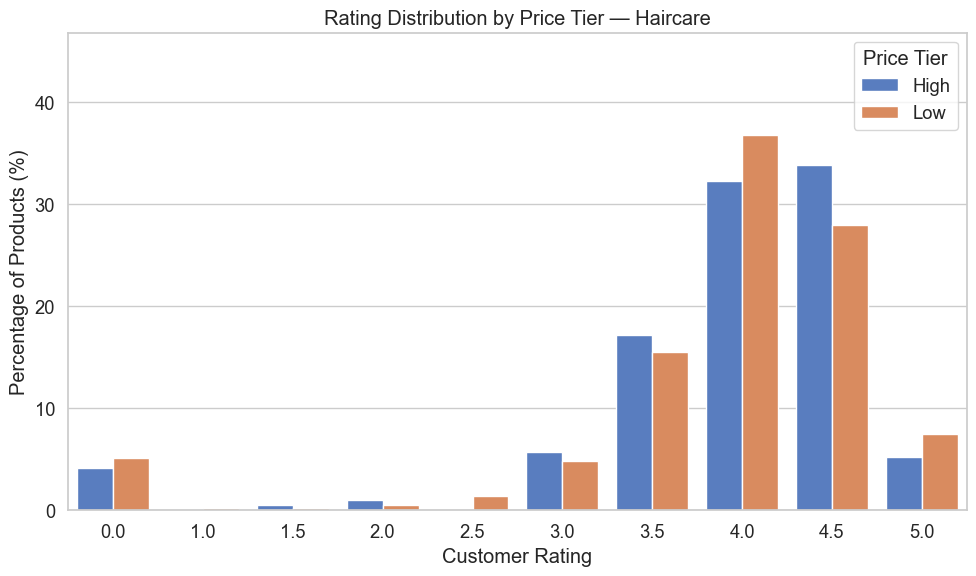

In [16]:
# Step 1: Define a function to prep rating distribution by tier
def prepare_rating_distribution(df, category_name):
    temp_df = df.copy()
    
    # Optional: ensure ratings are rounded to 0.5 just in case
    temp_df["rating_rounded"] = temp_df["rating"].round(1)
    
    # Count number of products per tier and rating
    count_df = (
        temp_df.groupby(["price_tier", "rating_rounded"])
        .size()
        .reset_index(name="count")
    )

    # Get total products per tier
    total_per_tier = count_df.groupby("price_tier")["count"].sum().to_dict()

    # Calculate percentage
    count_df["percent"] = count_df.apply(
        lambda row: (row["count"] / total_per_tier[row["price_tier"]]) * 100, axis=1
    )

    return count_df

# Step 2: Create dataframes for Makeup and Haircare
makeup_chart_df = prepare_rating_distribution(makeup_df, "Makeup")
haircare_chart_df = prepare_rating_distribution(haircare_df, "Haircare")

# Step 3: Plot function
def plot_grouped_bar(data, category_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=data,
        x="rating_rounded",
        y="percent",
        hue="price_tier",
        palette="muted"
    )
    plt.title(f"Rating Distribution by Price Tier — {category_name}")
    plt.xlabel("Customer Rating")
    plt.ylabel("Percentage of Products (%)")
    plt.legend(title="Price Tier")
    plt.ylim(0, data["percent"].max() + 10)
    plt.savefig("barchart.svg")
    plt.tight_layout()

    plt.show()

# Step 4: Plot each category
plot_grouped_bar(makeup_chart_df, "Makeup")
plot_grouped_bar(haircare_chart_df, "Haircare")

